# Calculating line widths for flux maps

For this, rather than taking values from solutions the values are inputted manually from the escher maps. It would be better from the solution dfs but I don't fancy coding this at the moment...

In [ ]:
import itertools

import numpy as np
import pandas as pd

In [ ]:
conditions_permutations = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
    ["fluxes", "minimum", "maximum"],
]

solutions_df_columns = pd.MultiIndex.from_product(
    conditions_permutations, names=["Light", "ATPase", "Starch", "Solution"]
)
solutions_df = pd.DataFrame(columns=solutions_df_columns)

conditions_list_of_lists = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
]
conditions_iterations = list(itertools.product(*conditions_list_of_lists))

cols_to_drop = []
for conditions in conditions_iterations:
    light_condition, atpase_condition, starch_condition = conditions
    file_name = f"../outputs/model_solutions/{light_condition}_{atpase_condition}_{starch_condition}.csv"
    try:
        condition_df = pd.read_csv(file_name, index_col=0)
        for col in ["fluxes", "minimum", "maximum"]:
            solutions_df.loc[
                :, (light_condition, atpase_condition, starch_condition, col)
            ] = condition_df.loc[:, col]
    except:
        cols_to_drop.append(conditions)
        print(f"File {file_name} doesn't exist, skipping")


solutions_df_unphased = solutions_df.copy()
index_phased = pd.MultiIndex.from_tuples(
    [
        (reaction[:-2], int(reaction[-1]))
        if reaction[-1] in ["1", "2", "3", "4"]
        else (reaction, None)
        for reaction in solutions_df.index
    ],
    names=["Reaction", "Phase"],
)
solutions_df.index = index_phased
solutions_df = solutions_df.drop(cols_to_drop, axis=1)

/tmp/ipykernel_3699541/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp/ipykernel_3699541/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp/ipykernel_3699541/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp

In [ ]:
solutions_df = solutions_df.xs("fluxes", level="Solution", axis=1).xs(2, level="Phase")

In [ ]:
flux_dict_used_for_current_lines = {
    "blue": {
        "unconstrained": {
            "wt": {
                "mal_to_suc": 0.000829,  # "PEPCARBOXYKIN_RXN_c_gc_2"
                "mal_deg": 0.000768,  # "MALIC_NAD_RXN_m_gc_2"
                "mal_v_c": 0.0106,  # "MAL_vc_gc_2"
            },
            "starchko": {
                "mal_to_suc": 0.000829,  # "PEPCARBOXYKIN_RXN_c_gc_2"
                "mal_deg": 0.000768,  # "MALIC_NAD_RXN_m_gc_2"
                "mal_v_c": 0.0106,  # "MAL_vc_gc_2"
            },
        },
        "constrained": {
            "wt": {
                "starch_to_glc": 0.00715,  # "RXN_1827_p_gc_2"
                "mal_deg": 0.000537,  # "MALIC_NAD_RXN_m_gc_2"
                "mal_v_c": 0.00358,  # "MAL_vc_gc_2"
            },
            "starchko": {
                "mal_deg": 0.000351,  # "PEPCARBOXYKIN_RXN_c_gc_2"
                "mal_v_c": 0.00234,  # "MAL_vc_gc_2"
                "suc_v_deg": 0.0141,  # "RXN_1461_v_gc_2"
            }
        }
    },
    "white": {
        "constrained": {
            "wt": {
                "starch_to_glc": 0.00675,  # "RXN_1827_p_gc_2"
                "ps_to_suc": 0.00103,  # "SUCROSE_PHOSPHATE_SYNTHASE_RXN_c_gc_2"
                "mal_v_c": 0.00503,  # "MAL_vc_gc_2"
                "mal_to_suc": 0.000754,  # "PEPCARBOXYKIN_RXN_c_gc_2"
            },
            "starchko": {
                "suc_v_deg": 0.0115,  # "RXN_1461_v_gc_2"
                "mal_c_v": 0.00342,  # "MAL_cv_gc_2"
                "ps_to_glc": 0.00128,  # "GLUC1PURIDYLTRANS_RXN_c_gc_2"
                "ps_to_ser": 0.00103,  # "PSERTRANSAM_RXN_p_gc_2"
                "lasp_to_mal": 0.00103,  # "ASPAMINOTRANS_RXN_c_gc_2"
            }
        }
    },
    "nops": {
        "constrained": {
            "wt": {
                "starch_to_glc": 0.00539,  # "GLC_pc_gc_2"
                "starch_to_glc_mal": 0.000281,  # "MALTODEG_RXN_c_gc_2"
                "suc_v_deg": 0.00301,  # RXN_1461_v_gc_2"
                "suc_c_v": 0.00301,  # SUCROSE_PROTON_cv_gc_2"
                "suc_c_deg": 0.00453,  # "RXN_1461_c_gc_2"
                "cit_to_mal": 0.0011,  # "FUMHYDR_RXN_m_gc_2"
                "starch_to_mal": 0.000281,  # "MALTODEG_RXN_c_gc_2"
            },
            "starchko": {
                "suc_c_deg": 0.00415,  # "RXN_1461_c_gc_2"
                "suc_v_deg": 0.00963,  # RXN_1461_v_gc_2"
                "suc_c_v": 0.00507,  # SUCROSE_PROTON_cv_gc_2"
                "mal_v_c": 0.00321,  # "MAL_vc_gc_2"
                "cit_to_mal": 0.000964,  # "FUMHYDR_RXN_m_gc_2"
            }
        }
    }
}

In [ ]:
flux_dict = {
    "blue": {
        "unconstrained": {
            "wt": {
                "mal_to_suc": "PEPCARBOXYKIN_RXN_c_gc_2",
                "mal_deg": "MALIC_NAD_RXN_m_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
            },
            "starchko": {
                "mal_to_suc": "PEPCARBOXYKIN_RXN_c_gc_2",
                "mal_deg": "MALIC_NAD_RXN_m_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
            },
        },
        "constrained": {
            "wt": {
                "starch_to_glc": "RXN_1827_p_gc_2",
                "mal_deg": "MALIC_NAD_RXN_m_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
            },
            "starchko": {
                "mal_deg": "PEPCARBOXYKIN_RXN_c_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
                "suc_v_deg": "RXN_1461_v_gc_2",
            }
        }
    },
    "white": {
        "constrained": {
            "wt": {
                "starch_to_glc": "RXN_1827_p_gc_2",
                "ps_to_suc": "SUCROSE_PHOSPHATE_SYNTHASE_RXN_c_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
                "mal_to_suc": "PEPCARBOXYKIN_RXN_c_gc_2",
            },
            "starchko": {
                "suc_v_deg": "RXN_1461_v_gc_2",
                "mal_c_v": "MAL_cv_gc_2",
                "ps_to_glc": "GLUC1PURIDYLTRANS_RXN_c_gc_2",
                "ps_to_ser": "PSERTRANSAM_RXN_p_gc_2",
                "lasp_to_mal": "ASPAMINOTRANS_RXN_c_gc_2",
            }
        }
    },
    "nops": {
        "constrained": {
            "wt": {
                "starch_to_glc": "GLC_pc_gc_2",
                "starch_to_glc_mal": "MALTODEG_RXN_c_gc_2",
                "suc_v_deg": "RXN_1461_v_gc_2",
                "suc_c_v": "SUCROSE_PROTON_cv_gc_2",
                "suc_c_deg": "RXN_1461_c_gc_2",
                "cit_to_mal": "FUMHYDR_RXN_m_gc_2",
                "starch_to_mal": "MALTODEG_RXN_c_gc_2",
            },
            "starchko": {
                "suc_c_deg": "RXN_1461_c_gc_2",
                "suc_v_deg": "RXN_1461_v_gc_2",
                "suc_c_v": "SUCROSE_PROTON_cv_gc_2",
                "mal_v_c": "MAL_vc_gc_2",
                "cit_to_mal": "FUMHYDR_RXN_m_gc_2",
            }
        }
    }
}

In [ ]:
conditions_list_of_lists = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
]
conditions_iterations = list(itertools.product(*conditions_list_of_lists))

In [ ]:
for light, light_dict in flux_dict.items():
    for atpase, atpase_dict in light_dict.items():
        for starch, starch_dict in atpase_dict.items():
            for shorthand, reaction_name in starch_dict.items():
                flux_dict[light][atpase][starch][shorthand] = solutions_df.loc[reaction_name[:-2],
                                                                               (light, atpase, starch)]

In [ ]:
solutions_df.loc["GLUC1PURIDYLTRANS_RXN_c_gc"]

Light  ATPase         Starch  
blue   unconstrained  wt          0.000207
                      starchko    0.000207
       constrained    wt          0.000000
                      starchko    0.000000
white  unconstrained  wt          0.001035
                      starchko    0.001035
       constrained    wt          0.001034
                      starchko    0.001277
nops   unconstrained  wt         -0.000181
                      starchko   -0.000181
       constrained    wt          0.000000
                      starchko    0.000000
Name: GLUC1PURIDYLTRANS_RXN_c_gc, dtype: float64

In [ ]:
flux_dict

{'blue': {'unconstrained': {'wt': {'mal_to_suc': 0.0008289898627844,
    'mal_deg': 0.0007676620759999,
    'mal_v_c': 0.0106443462585623},
   'starchko': {'mal_to_suc': 0.0008290421603011,
    'mal_deg': 0.0007676645791103,
    'mal_v_c': 0.0106447115960767}},
  'constrained': {'wt': {'starch_to_glc': 0.0071546631221892,
    'mal_deg': 0.0005368531416866,
    'mal_v_c': 0.0035790209445786},
   'starchko': {'mal_deg': 0.0003506965771044,
    'mal_v_c': 0.0023379771806966,
    'suc_v_deg': 0.0141231690783069}}},
 'white': {'constrained': {'wt': {'starch_to_glc': 0.0067465664160409,
    'ps_to_suc': 0.001033719635386,
    'mal_v_c': 0.0050291967341846,
    'mal_to_suc': 0.000754379510124},
   'starchko': {'suc_v_deg': 0.01146912726653,
    'mal_c_v': 0.0034203466880023,
    'ps_to_glc': 0.0012772416843743,
    'ps_to_ser': 0.0010261040064381,
    'lasp_to_mal': 0.0010261040065314}}},
 'nops': {'constrained': {'wt': {'starch_to_glc': 0.0053907431500898,
    'starch_to_glc_mal': 0.00028127

In [ ]:
from sigfig import round

In [ ]:
for light in flux_dict.keys():
    for atpase in flux_dict[light].keys():
        for starch in flux_dict[light][atpase].keys():
            for reaction in flux_dict[light][atpase][starch].keys():
                if round(flux_dict[light][atpase][starch][reaction], sigfigs=3) - flux_dict_used_for_current_lines[light][atpase][starch][reaction] != 0:
                    print(light, atpase, starch, reaction, round(
                        flux_dict[light][atpase][starch][reaction], sigfigs=3), flux_dict_used_for_current_lines[light][atpase][starch][reaction])

nops constrained wt cit_to_mal 0.00113 0.0011


In [ ]:
def NestedDictValues(d):
    for v in d.values():
        if isinstance(v, dict):
            yield from NestedDictValues(v)
        else:
            yield v

In [ ]:
min_flux = np.array(list(NestedDictValues(flux_dict))).min()
min_flux

0.0002812795634735

In [ ]:
max_flux = np.array(list(NestedDictValues(flux_dict))).max()
max_flux

0.0141231690783069

In [ ]:
max_flux/min_flux

50.210434430077164

So we have a 50-fold difference between the smallest and largest flux. 5mm in the inkscape figures that I've created is probably the max I can do, so 0.1 is the minimum.

Inkscape will only do widths to nearest 0.01mm I think, but allows you to input 3 numbers after the dp.

In [ ]:
def convert_fluxes_to_widths_linear(flux):
    max_width_in_inkscape = 5
    conversion = max_width_in_inkscape/max_flux

    new_flux = conversion*flux
    new_flux_rounded = round(new_flux, 3)

    return new_flux_rounded

In [ ]:
import matplotlib.pyplot as plt

[<matplotlib.lines.Line2D>]

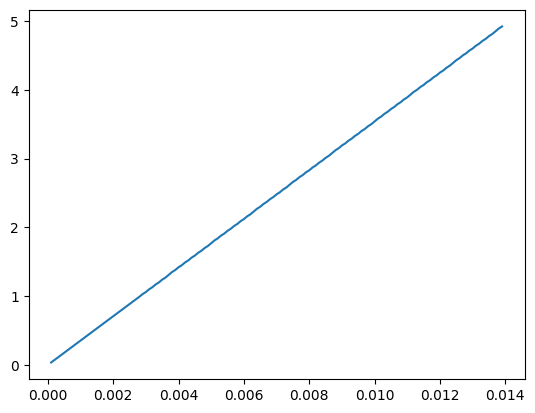

In [ ]:
x = np.arange(0.0001, 0.014, 0.0001)
y = [convert_fluxes_to_widths_linear(flux) for flux in x]

plt.plot(x, y)

In [ ]:
import copy

In [ ]:
def convert_flux_dict(flux_dict):
    converted_dict = copy.deepcopy(flux_dict)
    for light_value, light_dict in flux_dict.items():
        for atpase_constraint, atpase_dict in light_dict.items():
            for phenotype, phenotype_dict in atpase_dict.items():
                for reaction, reaction_value in phenotype_dict.items():
                    converted_dict[light_value][atpase_constraint][phenotype][reaction] = convert_fluxes_to_widths_linear(
                        reaction_value)

    return converted_dict

In [ ]:
converted_dict = convert_flux_dict(flux_dict)

/home/nls119/lib/miniconda3/envs/mmon-gcm/lib/python3.10/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


In [ ]:
for light, light_dict in converted_dict.items():
    for atpase, atpase_dict in light_dict.items():
        for starch, starch_dict in atpase_dict.items():
            print(f"{light}_{atpase}_{starch}:")
            for shorthand, mm in starch_dict.items():
                print(f"{shorthand} should be {mm}mm wide")
            print("\n")

blue_unconstrained_wt:
mal_to_suc should be 0.293mm wide
mal_deg should be 0.272mm wide
mal_v_c should be 3.77mm wide


blue_unconstrained_starchko:
mal_to_suc should be 0.294mm wide
mal_deg should be 0.272mm wide
mal_v_c should be 3.77mm wide


blue_constrained_wt:
starch_to_glc should be 2.53mm wide
mal_deg should be 0.19mm wide
mal_v_c should be 1.27mm wide


blue_constrained_starchko:
mal_deg should be 0.124mm wide
mal_v_c should be 0.828mm wide
suc_v_deg should be 5.0mm wide


white_constrained_wt:
starch_to_glc should be 2.39mm wide
ps_to_suc should be 0.366mm wide
mal_v_c should be 1.78mm wide
mal_to_suc should be 0.267mm wide


white_constrained_starchko:
suc_v_deg should be 4.06mm wide
mal_c_v should be 1.21mm wide
ps_to_glc should be 0.452mm wide
ps_to_ser should be 0.363mm wide
lasp_to_mal should be 0.363mm wide


nops_constrained_wt:
starch_to_glc should be 1.91mm wide
starch_to_glc_mal should be 0.0996mm wide
suc_v_deg should be 1.07mm wide
suc_c_v should be 1.07mm wide
su

## For the key:

In [ ]:
import cobra
import pandas as pd
from mmon_gcm.supermodel import SuperModel

In [ ]:
parameters_df = pd.read_csv("../inputs/arabidopsis_parameters.csv", index_col=0)
four_stage_GC_model = cobra.io.sbml.read_sbml_model("../models/4_stage_GC.xml")  # read model
arabidopsis_supermodel = SuperModel(parameters_df.loc[:, "Value"], fba_model=four_stage_GC_model);

No objective coefficients in model. Unclear what should be optimized
/home/nls119/src/mmon-gcm2/mmon_gcm/supermodel.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for parameter, value in parameters.iteritems():


In [ ]:
arabidopsis_supermodel.N_gcs

580000000.0

In [ ]:
0.01/arabidopsis_supermodel.N_gcs

1.724137931034483e-11

In [ ]:
moles_gc_h = 10 * 10 ** -15  # fmolesgc-1h-1

In [ ]:
moles_m2_h = moles_gc_h*arabidopsis_supermodel.N_gcs  # molesh-1

In [ ]:
mmoles_m2_h = moles_m2_h * 10 ** 3
mmoles_m2_h

0.005800000000000001

In [ ]:
f"{convert_fluxes_to_widths_linear(mmoles_m2_h)}mm for a flux of 10 fmoles gc-1 h-1"

'2.05mm for a flux of 10 fmoles gc-1 h-1'